<a href="https://colab.research.google.com/github/OJO44/24bMachineLearning1/blob/main/Clustering%26PCAWeeklyProjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the necessary python libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#Load data
data = "/content/Bank_Personal_Loan_Modelling-1.csv"
loan= pd.read_csv(data)
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#scaling income and ccavg to easily use them in segmentation
scaler = StandardScaler()
loan[['Income_scaled', 'CCAvg_scaled']] = scaler.fit_transform(loan[['Income','CCAvg']])
loan[['Income_scaled', 'CCAvg_scaled']].describe()

,Income_scaled,CCAvg_scaled
count,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


In [ ]:
#try a k mean clustering using the scaled column
model = KMeans(n_clusters=3, random_state=42)
cluster_cols = ['Income_scaled', 'CCAvg_scaled']
model.fit(loan[cluster_cols])
loan['Cluster'] = model.predict(loan[cluster_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


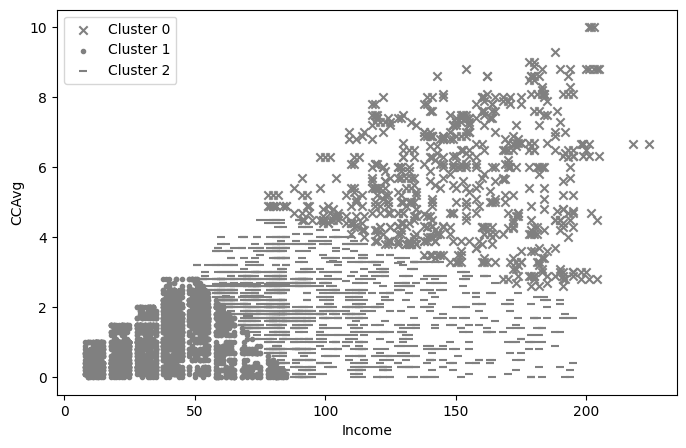

In [ ]:
#visualize the cluster using a scatter plot
# Set the marker styles
markers = ['x', '.', '_']

# Create a figure with a larger size
plt.figure(figsize=(8, 5))

# Iterate through the clusters
for cluster in range(3):
    # Get the data for the current cluster
    cluster_data = loan[loan.Cluster == cluster]

    # Plot the data for the current cluster
    plt.scatter(cluster_data.Income, cluster_data.CCAvg,
                marker=markers[cluster],
                color='gray',
                label=f"Cluster {cluster}")

# Add labels and legend
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()

# Display the plot
plt.show()


In [ ]:
#get mean of income and ccavg for the 3 clusters
loan.groupby('Cluster')[['Income', 'CCAvg']].mean()

,Income,CCAvg
Cluster,,
0,150.390282,5.540345
1,39.135072,0.982417
2,96.142777,2.025165


both Income and CCAvg vary significantly by the clusters.

In [ ]:
#try PCA
# first create a copy of the loan dataset
loan1 =loan.copy()
loan1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_scaled,CCAvg_scaled,Cluster
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,-0.538229,-0.193385,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,-0.864109,-0.250611,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,-1.363793,-0.536736,1
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.569765,0.436091,2
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,-0.625130,-0.536736,1


In [ ]:
cluster_cols = ['Income', 'CCAvg', 'Age', 'Experience','Mortgage']
loan1[cluster_cols] = scaler.fit_transform(loan1[cluster_cols])

In [ ]:
loan1[cluster_cols].describe()

,Income,CCAvg,Age,Experience,Mortgage
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17,-2.131628e-18,-1.179501e-16,-5.613288e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00,-1.948906e+00,-2.014911e+00,-5.555239e-01
25%,-7.554825e-01,-7.084116e-01,-9.019702e-01,-8.812043e-01,-5.555239e-01
50%,-2.123482e-01,-2.506106e-01,-2.952359e-02,-9.121982e-03,-5.555239e-01
75%,5.263146e-01,3.216407e-01,8.429230e-01,8.629604e-01,4.375576e-01
max,3.263712e+00,4.613525e+00,1.889859e+00,1.996667e+00,5.688108e+00


In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(loan1[cluster_cols])
loan1['Cluster'] = model.predict(loan1[cluster_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#PCA
# create two new columns, pc1 and pc2, containing the data for PC1 and PC2 respectively
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(loan1[cluster_cols])
loan1['pc1'] = pca_res[:,0]
loan1['pc2'] = pca_res[:,1]


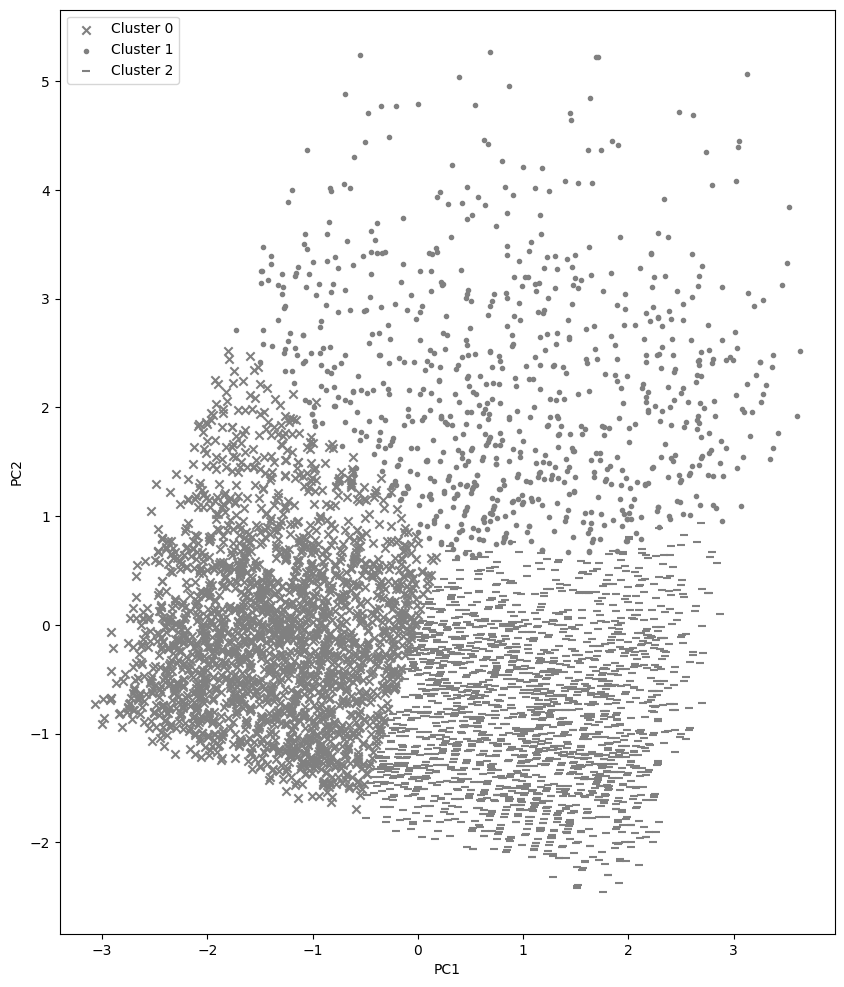

In [ ]:
#Visualize PCA
# Set the marker styles
markers = ['x', '.', '_']

# Create a figure with a larger size
plt.figure(figsize=(10, 12))

# Iterate through the clusters
for cluster in range(3):
    # Get the data for the current cluster
    cluster_data = loan1[loan1.Cluster == cluster]

    # Plot the data for the current cluster
    plt.scatter(cluster_data.pc1, cluster_data.pc2,
                marker=markers[cluster],
                label=f"Cluster {cluster}",
                color='gray')

# Add labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Display the plot
plt.show()


In [ ]:
#average values of the original features used for clustering against the three clusters and check which features are the most differentiated for the clusters.
loan['Cluster'] = loan1.Cluster
loan.groupby('Cluster')[cluster_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage
Cluster,,,,,
0,58.941774,1.367514,55.536044,30.233826,45.134935
1,147.650185,4.856403,43.672435,18.644005,116.279357
2,60.124322,1.382121,35.116428,9.873705,44.771584


 it is only Age and Experience that are different across the three
clusters. All other features have similar values for two of the three clusters.